In [1]:
import numpy as np
import pandas as pd

In [2]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_budget_list=["./budget"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_budget_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./SSGA_budget.csv",header=True,index=True)

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                590      593      579      588      589      591      576  \
F8 Times1   40099.0  40099.0  40199.0  40099.0  40099.0  40099.0  40199.0   
   Times2   40099.0  40099.0  40199.0  40099.0  40099.0  40099.0  40199.0   
   Times3   40099.0  40099.0  40199.0  40099.0  40099.0  40099.0  40199.0   
   Times4   40099.0  40099.0  40199.0  40099.0  40099.0  40099.0  40199.0   
   Times5   40099.0  40099.0  40199.0  40099.0  40099.0  40099.0  40199.0   
   Times6   40099.0  40099.0  40199.0  40099.0  40099.0  40099.0  40199.0   
   Times7   40099.0  40099.0  40199.0  40099.0  40099.0  40099.0  40199.0   
   Times8   40099.0  40099.0  40199.0  40099.0  40099.0  40099.0  40199.0   
   Times9   40099.0  40099.0  40199.0  40099.0  40099.0

In [3]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_percent_list=["./combination"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_percent_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./SSGA_rawdata.csv",header=True,index=True)

def percent(Function, optimal):
    dataframe = df.loc[(Function, slice(None)), :]
    dataframe = pd.DataFrame(data=dataframe.values,
                             columns=dataframe.columns)
    percent_dataframe = dataframe.applymap(lambda x: True if ((x-optimal)<=threshold or x<=optimal) else False)
    percent_dataframe["Function"] = Function
    return percent_dataframe

threshold =0.0001
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 50, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,-10.4028, -10.5363]
function_list = [8,9]
percent_df = [percent(Function="F" + str(i), optimal=opt[i - 1]) for i in function_list]
percent_df = pd.concat(percent_df, axis=0)
percent_df = percent_df.groupby(["Function"]).sum().applymap(lambda x: str(x * 10) + "%")
index = ["F" + str(i) for i in function_list]
percent_df = percent_df.loc[index]
display(percent_df)
percent_df.to_csv("./SSGA_percent.csv")

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                     590           593           579           588  \
F8 Times1  -18456.975464 -18573.465177 -17747.369641 -18098.539341   
   Times2  -17974.632036 -18573.208095 -19169.352881 -19048.333953   
   Times3  -18807.774740 -19048.849718 -18337.569490 -18337.459829   
   Times4  -18095.510505 -18573.462513 -19168.430179 -17627.819495   
   Times5  -19161.962156 -19166.997271 -18102.395851 -18812.161639   
   Times6  -19521.407497 -18571.427155 -18931.538934 -18221.035971   
   Times7  -18693.974187 -17979.651135 -19405.681424 -18453.924278   
   Times8  -18334.623005 -18688.994804 -18338.391970 -18218.861301   
   Times9  -18334.900522 -18336.716316 -18341.386074 -18338.464225   
   Times10 -18686.654240 -18453.691073 -18693.56

,590,593,579,588,589,591,576,587,569,558,592,572,594,542,570,562,575,573,552,555
Function,,,,,,,,,,,,,,,,,,,,
F8,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F9,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_7067/2336809088.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax=sns.barplot(data=dataframe,y="Percent",x="Function",ci=95)


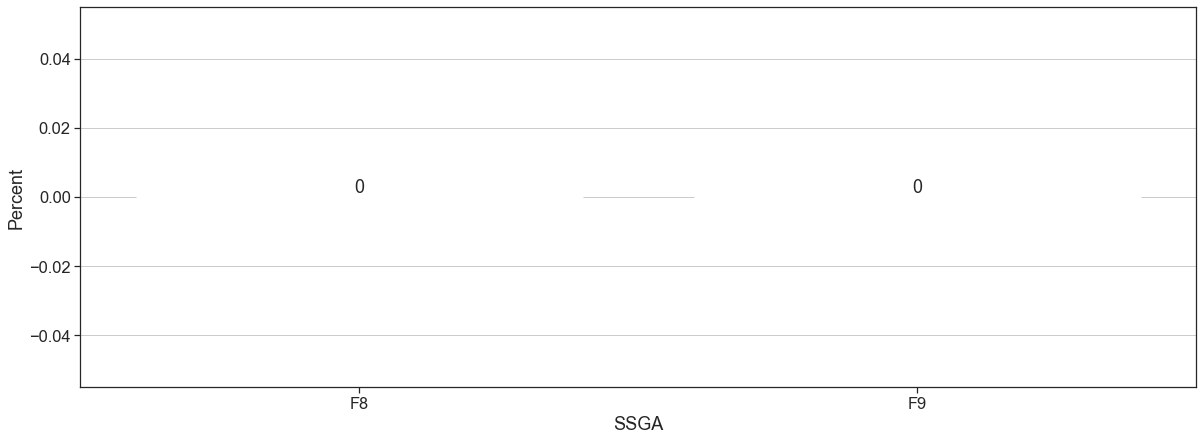

In [4]:
from matplotlib import pyplot as plt
dataframe = percent_df.copy()
dataframe = dataframe.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
# display(dataframe)
import seaborn as sns
dataframe = dataframe.stack()
# display(dataframe)
dataframe = dataframe.rename_axis(index=["Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 1], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
# display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    plt.figure(figsize=(20,7))
    plt.subplot(1,1,1)
    ax=sns.barplot(data=dataframe,y="Percent",x="Function",ci=95)
    ax.bar_label(ax.containers[0],label_type='edge')
    plt.xlabel("SSGA")
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
    plt.savefig("./SSGA_percent.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [5]:
# from matplotlib import pyplot as plt
# dataframe = df.copy()
# dataframe = dataframe.stack()
# # display(dataframe)
# dataframe = dataframe.rename_axis(index=["Function","Times","Combinations"])
# dataframe = dataframe.reset_index(level=[0, 1], name="Solutions")
# dataframe["Solutions"] = pd.to_numeric(dataframe["Solutions"])
# dataframe = dataframe.reset_index(drop=False)
# # display(dataframe)
# opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
# def show_graph(dataframe):
#     sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
#     dist_cols = 3
#     dist_rows = 8
#     plt.figure(figsize=(7 * dist_cols, 4 * dist_rows))
#     i = 1
#     for function in function_list:
#         dataf = dataframe[dataframe["Function"] == function]
#         plt.subplot(dist_rows, dist_cols, i)
#         ax=sns.boxplot(data=dataf, y="Solutions",palette="viridis",x="Function",hue="Function",width=0.2)
#         sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1),frameon=False)
#         plt.axhline(y=opt[i-1],color="red")
#         plt.xlabel("")
#         plt.ylabel("Solutions")
#         i = i + 1
#     plt.savefig("./boxplot_SSGA.png", dpi=1200, bbox_inches='tight')
#     plt.show()
# show_graph(dataframe=dataframe)